# Importing Libraries & Reading the data

In [164]:
#importing the libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy import stats
import calendar

In [165]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
file_path = "/content/drive/MyDrive/archive (4).zip"

In [167]:
data = pd.read_csv(file_path)

<ipython-input-167-2861b702887f>:1: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [168]:
#dataframe
df = data.copy()

# Data Description

In [169]:
#number of rows and columns in the dataset
df.shape

(855969, 73)

In [170]:
#info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  int64  
 3   funded_amnt                  855969 non-null  int64  
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [171]:
#column names
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [172]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [173]:
#summary statistics
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,...,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,...,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000,0.000000
75%,5.446311e+07,5.803559e+07,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,...,87.500000,2.000000,4.000000,7701.250000,75.300000,3.990000e+04,1.000000,2.000000,3.000000,0.000000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,223.300000,22.000000,43.000000,83047.000000,151.400000,9.999999e+06,15.000000,33.000000,32.000000,1.000000


# Feature Selection

In [174]:
#finding columns with null values(more than 30%)

#no of rows
total_rows = len(df)

#no of null values in each column
null_counts = df.isnull().sum()

# % of null values in each column
null_percentages = (null_counts / total_rows) * 100

#dataframe for displaying
null_summary = pd.DataFrame({
    'Column Name': null_counts.index,
    'Null Values': null_counts.values,
    'Null Percentage': null_percentages.values
})

#columns with null % above threshhold(30%)
null_summary_above_30 = null_summary[null_summary['Null Percentage'] > 30]

#sorting in desc order
null_summary_above_30 = null_summary_above_30.sort_values(by='Null Percentage', ascending=False)

print(null_summary_above_30)

                    Column Name  Null Values  Null Percentage
51             annual_inc_joint       855527        99.948363
52                    dti_joint       855527        99.948363
53    verification_status_joint       855527        99.948363
63                      il_util       844360        98.643759
61           mths_since_rcnt_il       843035        98.488964
60                  open_il_24m       842681        98.447607
70                  total_cu_tl       842681        98.447607
69                       inq_fi       842681        98.447607
67                     all_util       842681        98.447607
66                   max_bal_bc       842681        98.447607
65                  open_rv_24m       842681        98.447607
64                  open_rv_12m       842681        98.447607
71                 inq_last_12m       842681        98.447607
62                 total_bal_il       842681        98.447607
59                  open_il_12m       842681        98.447607
58      

In [175]:
#dropping columns above 30% null values

columns_to_drop = null_summary_above_30['Column Name'].tolist()
df.drop(columns=columns_to_drop, inplace=True)

print(df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind'],
      dtype='object')


In [176]:
#dropping some other columns. came to this conclusion after carefully examining tha data by ourselves

columns_to_drop = ['title', 'total_pymnt', 'addr_state', 'last_credit_pull_d', 'member_id', 'total_acc', 'recoveries', 'pymnt_plan', 'next_pymnt_d', 'policy_code', 'total_pymnt_inv', 'loan_amnt', 'funded_amnt_inv', 'initial_list_status', 'out_prncp_inv', 'collection_recovery_fee', 'zip_code', 'id', 'out_prncp', 'total_rev_hi_lim', 'last_pymnt_amnt', 'total_rec_int', 'total_rec_prncp', 'emp_title', 'earliest_cr_line', 'issue_d', 'last_pymnt_d']
df.drop(columns=columns_to_drop, inplace=True)

print(df.columns)
print(df.shape[1])

Index(['funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_rec_late_fee',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'default_ind'],
      dtype='object')
25


# Treating Columns with Missing Values

In [177]:
#finding columns with missing values out of the remaining columns

total_rows = len(df)
missing_counts = df.isnull().sum()
missing_percentages = (missing_counts / total_rows) * 100

missing_summary = pd.DataFrame({
    'Column Name': missing_counts.index,
    'Missing Values': missing_counts.values,
    'Missing Percentage': missing_percentages.values
})
columns_with_missing_values = missing_summary[missing_summary['Missing Values'] > 0]

print(columns_with_missing_values)

                   Column Name  Missing Values  Missing Percentage
6                   emp_length           43061            5.030673
17                  revol_util             446            0.052105
19  collections_12_mths_ex_med              56            0.006542
22                tot_coll_amt           67313            7.863953
23                 tot_cur_bal           67313            7.863953


In [178]:
#replacing missing values in column 21 and 22 with median
numeric_columns = ['tot_coll_amt', 'tot_cur_bal']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

In [179]:
#dropping rows with missing values in column 16 and 18
drop_columns = ['revol_util', 'collections_12_mths_ex_med']
df = df.dropna(subset=drop_columns)

In [180]:
#replacing missing values in column 6 with mode

percentage_of_emp_length = df['emp_length'].value_counts(normalize=True) * 100
print(percentage_of_emp_length)

mode_emp_length = df['emp_length'].mode().values[0]
df['emp_length'].fillna(mode_emp_length, inplace=True)

10+ years    34.704051
2 years       9.347740
< 1 year      8.312562
3 years       8.290652
1 year        6.746625
5 years       6.620459
4 years       6.230267
7 years       5.314240
8 years       5.218354
6 years       5.098711
9 years       4.116339
Name: emp_length, dtype: float64


# Exploratory Data Analysis

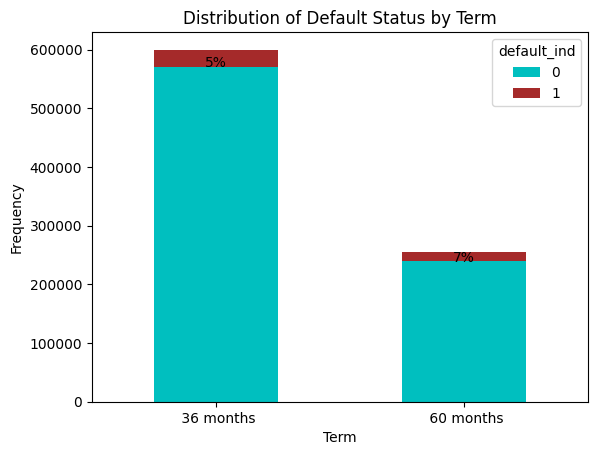

In [181]:
# TERM against DEFAULT

data = pd.DataFrame({
    'term': df['term'],
    'default_ind': df['default_ind']
})

grouped = data.groupby(['term', 'default_ind']).size().unstack(fill_value=0)
grouped_percentage = (grouped[1] / grouped.sum(axis=1) * 100).round().astype(int)

colors = ['c', 'brown']

#stacked bar plot
ax = grouped.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.title('Distribution of Default Status by Term')
plt.xticks(rotation=0)

#annotating the rounded percentage of '1' on top of each stacked bar
for p, percentage in zip(ax.patches, grouped_percentage):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{percentage}%', (x + width / 2, height + 1), ha='center')

plt.show()

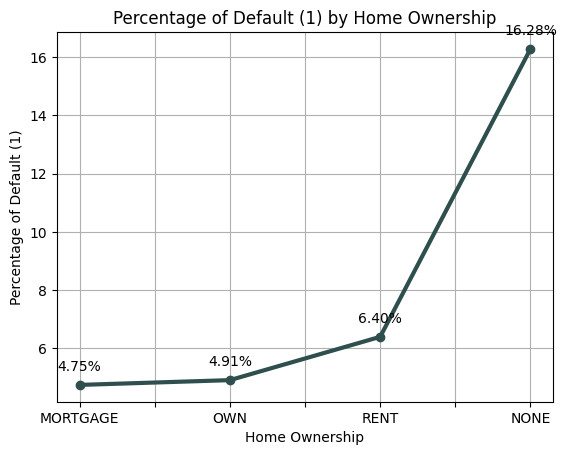

In [182]:
# HOME OWNERSHIP against DEFAULT

data = pd.DataFrame({
    'home_ownership': df['home_ownership'],
    'default_ind': df['default_ind']
})

data = data[(data['home_ownership'] != 'ANY') & (data['home_ownership'] != 'OTHER')]

grouped = data.groupby('home_ownership')['default_ind'].mean() * 100
grouped = grouped.sort_values()

grouped.plot(kind='line', marker='o', linestyle='-', color='darkslategrey', linewidth=3)
plt.xlabel('Home Ownership')
plt.ylabel('Percentage of Default (1)')
plt.title('Percentage of Default (1) by Home Ownership')
plt.xticks(rotation=0)
plt.grid(True)

for x, y in zip(range(len(grouped.index)), grouped.values):
    plt.annotate(f'{y:.2f}%', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


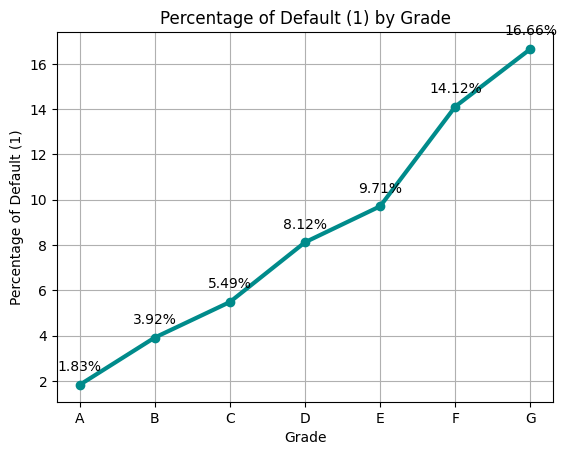

In [183]:
# GRADE against DEFAULT

data = pd.DataFrame({
    'grade': df['grade'],
    'default_ind': df['default_ind']
})

grouped = data.groupby('grade')['default_ind'].mean() * 100

#line graph
grouped.plot(kind='line', marker='o', linestyle='-', color='darkcyan', linewidth=3)
plt.xlabel('Grade')
plt.ylabel('Percentage of Default (1)')
plt.title('Percentage of Default (1) by Grade')
plt.xticks(rotation=0)
plt.grid(True)

for x, y in zip(range(len(grouped.index)), grouped.values):
    plt.annotate(f'{y:.2f}%', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


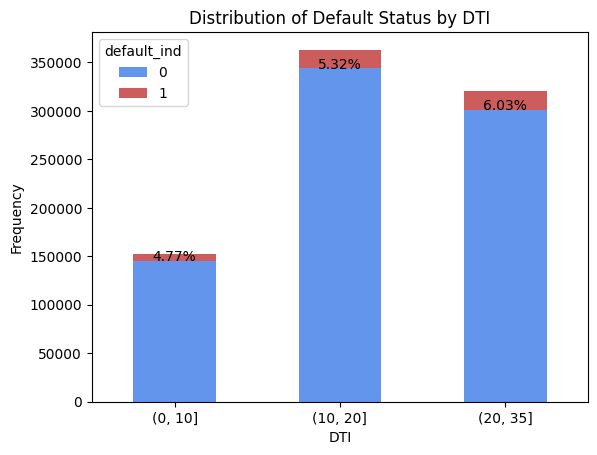

In [184]:
# DTI against DEFAULT

data = pd.DataFrame({
    'dti': pd.cut(df['dti'], bins=[0, 10, 20, 35]),
    'default_ind': df['default_ind']
})

grouped = data.groupby(['dti', 'default_ind']).size().unstack(fill_value=0)
grouped_percentage = (grouped[1] / grouped.sum(axis=1) * 100)

colors=['cornflowerblue', 'indianred']

ax = grouped.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('DTI')
plt.ylabel('Frequency')
plt.title('Distribution of Default Status by DTI')
plt.xticks(rotation=0)

for p, percentage in zip(ax.patches, grouped_percentage):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{percentage:.2f}%', (x + width / 2, height + 1), ha='center')

plt.show()


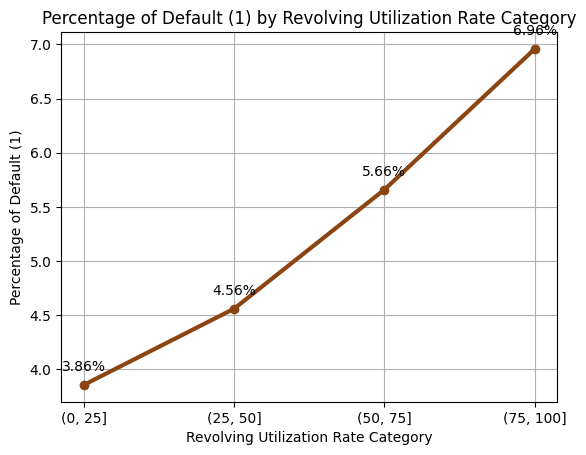

In [185]:
# REVOLVING UTILIZATION against DEFAULT

data = pd.DataFrame({
    'revol_util': pd.cut(df['revol_util'], bins=[0, 25, 50, 75, 100]),
    'default_ind': df['default_ind']
})

grouped = data.groupby(['revol_util', 'default_ind']).size().unstack(fill_value=0)
grouped_percentage = (grouped[1] / grouped.sum(axis=1) * 100)

grouped_percentage.plot(kind='line', marker='o', linestyle='-', color='saddlebrown', linewidth=3)
plt.xticks(range(len(grouped_percentage.index)), grouped_percentage.index)
plt.xlabel('Revolving Utilization Rate Category')
plt.ylabel('Percentage of Default (1)')
plt.title('Percentage of Default (1) by Revolving Utilization Rate Category')
plt.grid(True)

for x, y in zip(range(len(grouped_percentage.index)), grouped_percentage.values):
    plt.annotate(f'{y:.2f}%', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()
